<a href="https://colab.research.google.com/github/aissahm/Unicamp-MO431/blob/master/MO431A_Tarefa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aissa Hadj Mohamed - RU 265189

# **MO431A - Tarefa 1**

**First, we import all the necessary libraries**

*Para este projeto você precisa ter o Python 3.X, numpy, 
matplotlib e sklearn. Provavelmente você deve também 
usar o jupyter como modo interativo já que 
ele imprime as imagens (veja abaixo) na 
pagina com a interação.*

In [0]:
import numpy
import matplotlib
import sklearn

Finally, we make sure we have the correct version of Python 3.X

In [0]:
import platform
print(platform.python_version())

3.6.9


## **Leia o arquivo X.npy**

*npy é um formato do numpy para armazenar matrizes de forma mais compacta que usando, por exemplo, um .csv*

*o numpy.load lê arquivos npy*

*X é um arquivo de 3023 linhas e 1850 colunas. Mas cada linha é na verdade uma imagem em tons de cinza de 50 por 37 pixels de pessoas famosas*

*X.npy esta em* [http://www.ic.unicamp.br/~wainer/cursos/1s2019/X.npy 

We download the file X.npy from the url above.

In [0]:
!wget http://www.ic.unicamp.br/~wainer/cursos/1s2019/X.npy


In [0]:
X = numpy.load('X.npy')

We print X to get an idea on how it looks like.

In [0]:
X

array([[ 58.       ,  92.666664 , 156.66667  , ...,  19.       ,
         17.666666 ,  19.666666 ],
       [ 73.       ,  80.333336 ,  74.333336 , ...,   8.666667 ,
          7.6666665,   7.6666665],
       [ 18.666666 ,  16.       ,  16.666666 , ...,  52.666668 ,
         23.       ,  24.666666 ],
       ...,
       [ 87.666664 ,  90.666664 ,  73.       , ..., 246.66667  ,
        235.66667  , 230.66667  ],
       [ 79.333336 ,  64.333336 ,  66.333336 , ...,  91.666664 ,
         94.       ,  93.333336 ],
       [ 88.       ,  95.666664 , 123.333336 , ...,  31.333334 ,
         39.333332 ,  40.333332 ]], dtype=float32)

We verifiy the size of X is correct

In [0]:
print("number of rows: ", X[:,1].size , ", columns: ", X[1,:].size)

number of rows:  3023 , columns:  1850


X.npy contains grayscale images. Thus, the values inside the matrix should be in range [0; 255]. Let's verify that.

In [0]:
print("lowest value containted in X: ", X.min())
print("highest value containted in X: ",X.max())

lowest value containted in X:  0.0
highest value containted in X:  255.0


## **Imprima a imagem da primeira pessoa.**

*A função imshow do subpacote pyplot do matplotlib imprime uma imagem. Mas cada linha da matriz X precisa ser transformada numa matriz 50x37 para que o imshow funcione (veja o reshape do numpy). Ha também a codificação de cores da imagem; como a imagem é em tons de cinza a codificação é a cm.gray*

Let's get the first image. For that, we extract the first row of X, we rearrange it as an 50x37 matrix.

In [0]:
X_0 = numpy.reshape(X[0], (50,-1))

In [0]:
print(X_0.size)

1850


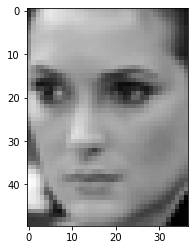

In [0]:
from matplotlib import cm
matplotlib.pyplot.imshow(X_0, cmap=cm.gray)

The first image is of a woman. The quality isn't that great since the image is blury and we can clearly see each pixel of the picture.

## **Faça a fatoração svd da matriz X.**

*A função é svd, do subpacote linalg do numpy faz a fatoração svd.*

*Lembre-se que nos vimos várias formulações para a fatoração SVD A = U D V^{-1} onde A é m x n. Na primeira formulação (do wikipedia por exemplo), que nós chamamos de full matix U é m x m, D é m x n, e V^{-1} é n x n. Esta fatoração é obtida pelo svd quando o parâmetro full_matrices é True. A segunda formulação que acho que chamamos de compacta é U é m x n, D é n x n, e V^{-1} é n x n, que é obtida quando full_matrizes é False. Gere as 2 fatorações svd e mostre que as matrizes são dos tamanhos corretos.*

**Primeira formulação com parametro full_matrices = True**

In [0]:
U, D, V_inverse = numpy.linalg.svd(X, full_matrices=True)

In [0]:
print(U.shape, D.shape, V_inverse.shape )

(3023, 3023) (1850,) (1850, 1850)


U and V_inverse have respectively sizes of 3023x3203, and 1850x1850. They are of correct sizes as expected. 

D is an 1850-element array. It contains all the singular values of X. As returned by the svd function from Numpy, it is a 3023x1850 matrix (its number of rows matches the number of columns of U, that is 3023).

**Segunda formulação com parametro full_matrices = False**


For more clarity, with the parameter full_matrices equal to false, we define U_2, D_2, and V_2_inverse for the SVD decomposition of X. 

In [0]:
U_2, D_2, V_2_inverse = numpy.linalg.svd(X, full_matrices=False)

Let's verify that the size of each matrix is correct.

In [0]:
print(U_2.shape, D_2.shape, V_2_inverse.shape )

(3023, 1850) (1850,) (1850, 1850)


U and V_inverse have respectively sizes of 3023x1850, and 1850x1850. They are of correct sizes as expected. 

D is an 1850-element array. It contains all the singular values of X. As returned by the svd function from Numpy it is a 1850x1850 matrix (its number of rows matches the number of columns of U, that is 1850).

## **Verifique a formulação compacta do SVD**

*Verifique o maior valor em modulo da diferença X - (U D V^{-1}), usando a 2a formulação. O maior valor em modulo é o maior erro da fatoração em relação a algum dado original. Compare esse valor do maior erro com o valor médio dos dados em X. Verifique que o erro é bem baixo. Note que o svd do numpy não retorna D como uma matriz (n x n) mas sim como um vetor com os elementos da matriz diagonal.*

Let's define the matrix Delta as equal to the difference X-(UDV_inv).

In [0]:
Delta = X - numpy.dot(U_2[:, :1850] * D_2, V_2_inverse)

Now, to get the highest entry in absolute value from the matrix Delta, we get its smallest as well as its highest values .

In [0]:
print(Delta.min())
print(Delta.max())

-0.00047302246
0.00044250488


The highest entry in absolute value is 0.00047302246, and thus it is almost null. That means that U D V^{-1} can be considered equal to X. 

Now, we compute the average entry value from X. Then, we express the highest error value as a percentage to the mean value of X.

In [0]:
X_mean = numpy.mean(X)
print("Mean value of X entries = ", X_mean)

percentage_ratio = -1 * Delta.min() * 100 / X_mean 
print("Ratio of the highest error value to the mean value of X = ",percentage_ratio)

Mean value of X entries =  129.54884
Ratio of the highest error value to the mean value of X =  0.00036513059366818793


Comparing the highest difference in value from the difference between X and its second SVD formulation and the average of the values of X, we clearly see that the difference is almost zero (0.00036%). We can thus safely aproximate X with its compact SVD fomulation as returned by Numpy.

## **Compute a matriz reduzida e a matriz reconstruída**

*Vamos usar a redução para 100 dimensões.*

**Matriz reduzida**

*O objetivo da redução da dimensionalidade da matriz X (3023 x 1850) é obter uma matriz com menos colunas k < 1850 que representa mais ou menos a mesma informação que X, mas com menos espaço de memória. Neste exercício, vamos usar k=100, ou seja queremos projetar cada imagem (que esta num espaço de 1850 dimensões) no melhor subespaço de 100 dimensões (quase 5% do número de dimensões originais) que representa ainda dos dados. Ou de outra forma, encontrar o subespaço de 150 dimensões cujo erro (quadrado) entre o dado original e sua projeção nesse subespaço seja a menos possível.*
A matriz reduzida de X será uma matriz de 3023 linhas (o mesmo numero de dados/imagens) mas de 100 colunas.* *A formulação do SVD para redução de dimensionalidade é X approx =  U_k D_k V_{k}^{-1}, onde U_k é a matriz U com apenas as primeiras k colunas, D_k é a matriz diagonal D com apenas as primeiras k linhas e colunas ou seja, X é aproximado pelo produto U_k D_k V_k^{-1}. A matriz U_k D_k é a matriz reduzida - cada ponto de dado original (3023 deles), que antes tinha 1850 dimensões, agora tem 100 dimensões!

To get the reduced matrix X_reduzed of X, we first get U_100 (containing the first 100 columns of U), D_100 containing the first 100 columns and rows of D. 

In [0]:
U_100 = U[:3023,:100]
D_100 = D[:100]
X_red = U_100 * D_100
X_red.shape

(3023, 100)

Below is the reduced matrix of X.

In [0]:
X_red

array([[-6.13680762e+03, -6.11641724e+02,  1.33340805e+02, ...,
         3.55448761e+01, -1.12824440e+01,  5.65715904e+01],
       [-5.64081494e+03, -7.66075684e+02, -4.05498566e+02, ...,
        -5.05070534e+01,  2.04780350e+01, -2.16700401e+01],
       [-4.16204736e+03,  4.47663086e+02,  1.29236145e+02, ...,
        -6.39729424e+01,  6.81879120e+01, -4.65324821e+01],
       ...,
       [-5.49598779e+03,  2.89236389e+02, -1.85689178e+02, ...,
        -1.51183958e+01, -3.12101307e+01, -7.52305603e+01],
       [-6.19488965e+03, -4.94539703e+02,  3.74282532e+01, ...,
        -4.82761383e+01, -2.15338936e+01, -6.27454605e+01],
       [-5.56833789e+03,  2.42458115e+02, -5.67365234e+02, ...,
         1.08143295e+02,  4.25028648e+01,  4.78551054e+00]], dtype=float32)

**Matriz reconstruída**

*A matriz reconstruída é uma matriz no espaço original (de 1850 dimensões) onde em vez da posição original de cada ponto, a linha representa a posição (no espaço de 1850 dimensões) da projeção do ponto no subespaço de 100 dimensões. A matriz reconstruída deve ter 1850 dimensões mas em vez da imagem original. temos a imagem quando projetada no subespaço de 100 dimensões da redução. A formula para a matriz reconstruída X_r é: X_r = U_k D_k V_k^{-1}*
​	

We define V_inv_100 as a matrix containing the first 100 rows of V_inv.

In [0]:
V_inv_100 = V_2_inverse[:100,:]

To reconstruct X, we do the matrix multiplication of the reduction of X  (X_red) with V_inv_100.

In [0]:
X_r = numpy.dot(X_red, V_inv_100)

Then, we take the first row of X_r, representing the first image, and we rearrange it as 50x37 matrix.

In [0]:
X_r_0 = numpy.reshape(X_r[0], (50,-1))

We verify that we get the right size.

In [0]:
X_r_0.shape

(50, 37)

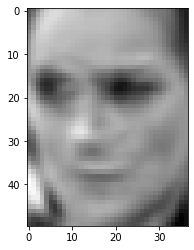

In [0]:
from matplotlib import cm
matplotlib.pyplot.imshow(X_r_0, cmap=cm.gray)

The picture from the reduced matrix looks even more blurry than the original image. 

However, we reduced the dimensions of X by more than 95% and we still have a very good quality picture for such reduction in dimension.

**Using sklearn**


Now, we try to get the same results as above using the library Sklearn.

In [0]:
from sklearn.decomposition import TruncatedSVD
from scipy.linalg import svd

Using the function fit_transform, we obtain the truncated matrix of X with 100 dimensions.

In [0]:
k = 100
svd = TruncatedSVD(k)
X_truncated = svd.fit_transform(X)
V_inv_100_sklearn = svd.components_

We verify the size of X_truncated and V_inverse_100.

In [0]:
X_truncated.shape
V_inv_100_sklearn.shape

(100, 1850)

In order to reconstruct X back to its 1850-dimension space from the truncated matrix of X, we do a matrix multiplication with V_100_sklearn.

In [0]:
X_truncated_2 = numpy.dot(X_truncated, V_inv_100_sklearn)
X_truncated_2.shape

(3023, 1850)

Now, we get the first row that contains the first image, and rearrange it into a 50x37 matrix.

In [0]:
X_truncated_0 = numpy.reshape(X_truncated_2[0], (50,-1))
X_truncated_0.shape

(50, 37)

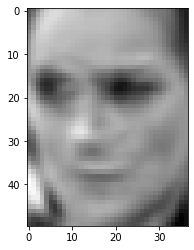

In [0]:
from matplotlib import cm
matplotlib.pyplot.imshow(X_truncated_0, cmap=cm.gray)

We reprint below the image we got by using Numpy.

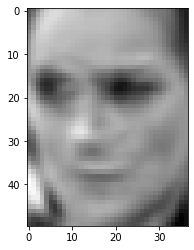

In [0]:
matplotlib.pyplot.imshow(X_r_0, cmap=cm.gray)

As we can see, we get the exact same results by either using Numpy or Sklearn.

Let's investigate the differences between the reconstructed matrices, from the two methods (Numpy and Sklearn), with the original matrix X.

In [0]:
Delta_sklearn = X - X_truncated_2

In [0]:
print(Delta_sklearn.min())
print(Delta_sklearn.max())

print (numpy.absolute(Delta_sklearn).mean())

-127.00249
140.34256
8.164033


In [0]:
Delta_numpy = X - X_r

In [0]:
print(Delta_numpy.min())
print(Delta_numpy.max())

print (numpy.absolute(Delta_numpy).mean())

-123.612305
136.08739
8.148394


At first, if we look at the difference for each pixel, it looks like reconstructing the matrix X is a bad method to approximate X, since the difference could jump to 140. The grayscale image range is of 255. 

If we compute the average absolute value of the errors for the two methods (8.16 for Sklearn, and 8.14 for Numpy), we can see that the error is very small. Expressed as a percentage of the grayscale image range of [0, 255], it's equal to 3.2% more or less. 

The differences between the two reconstructed matrices (using Numpy and Sklearn) with the original matrix X is very small. Taking into account that we decreased the dimensions of X by 95%, we managed to get an error rate of 3.2%. Thus, the two methods are very efficient at decreasing the memory needed to store X.